# Experiment 1: ViT-Lite-7/4 for Image Classification
Note: All (hyper)parameters according to [1][2]

In [1]:
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from timm.loss.cross_entropy import LabelSmoothingCrossEntropy

# add parent directory of this report to path, in order to import files from the `src` folder
pardir = os.path.join(os.getcwd(), os.pardir)
if pardir not in sys.path:
    sys.path.append(pardir)

from src.lr_schedulers import WarmUpLR
from src.model_variants import vit_lite_7_4
from src.pytorch_utils import seed_worker, set_all_seeds, Trainer

%matplotlib inline

In [2]:
SEED = 417 # generated with random.org (range 0 to 2^16)
EXPERIMENT_NAME = f"experiment-1_image-classification_seed-{SEED}"

LOG_DIR = os.path.join(os.curdir, "runs")
SAVED_MODELS_DIR = os.path.join(os.curdir, "saved_models")
DATA_DIR = os.path.join(os.pardir, "data")

NUM_EPOCHS = 100
LEARNING_RATE = 5e-4
WEIGHT_DECAY = 3e-2
NUM_EPOCHS_WARMUP = 10
BATCH_SIZE = 128

NUM_CLASSES = 10
IMG_SIZE = 32

NUM_WORKERS = 8

## Preprocessing
Here, the values for normalisation and standardisation of the images are calculated

In [3]:
train_raw = datasets.CIFAR10(DATA_DIR, train=True, download=True, transform=transforms.ToTensor())
val_raw = datasets.CIFAR10(DATA_DIR, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


Show the first 2 images of the dataset

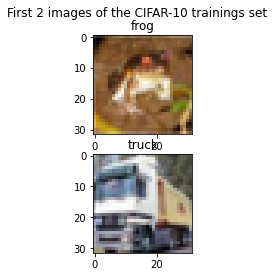

In [4]:
idx_to_class = {v: k for k, v in train_raw.class_to_idx.items()}

num_imgs = 2
fig, axs = plt.subplots(num_imgs)
fig.suptitle(f"First {num_imgs} images of the CIFAR-10 trainings set")

for i in range(num_imgs):
    img, idx = train_raw[i]
    axs[i].set_title(idx_to_class[idx])
    axs[i].imshow(img.permute(1, 2, 0))

Calculate the mean and the standard deviation per channel

In [5]:
train_raw_imgs = torch.stack([img for img, _ in train_raw], dim=0) # (50000, 3, 32, 32)
val_raw_imgs = torch.stack([img for img, _ in val_raw], dim=0) # (10000, 3, 32, 32)

train_mean, train_std = train_raw_imgs.mean(dim=(0, 2, 3)), train_raw_imgs.std(dim=(0, 2, 3))
val_mean, val_std = val_raw_imgs.mean(dim=(0, 2, 3)), val_raw_imgs.std(dim=(0, 2, 3))

train_mean, train_std, val_mean, val_std

(tensor([0.4914, 0.4822, 0.4465]),
 tensor([0.2470, 0.2435, 0.2616]),
 tensor([0.4942, 0.4851, 0.4504]),
 tensor([0.2467, 0.2429, 0.2616]))

## Setup
Setup the experiment (reset seeds, load datasets, create model, criterion, optimizer and scheduler)

In [6]:
set_all_seeds(SEED)

In [7]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Normalise the training and validation set with the calculated values and load them

In [8]:
train_set = datasets.CIFAR10(DATA_DIR, train=True, download=False, 
                             transform=transforms.Compose([transforms.RandomCrop(IMG_SIZE, padding=4),
                                                                    transforms.RandomHorizontalFlip(),
                                                                    transforms.ToTensor(),
                                                                    transforms.Normalize(train_mean, train_std)]))

train_set_loader = DataLoader(dataset=train_set, shuffle=True, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, 
                              worker_init_fn=seed_worker, generator=torch.Generator().manual_seed(SEED))

val_set = datasets.CIFAR10(DATA_DIR, train=False, download=False, 
                           transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(val_mean, val_std)]))


val_set_loader = DataLoader(dataset=val_set, shuffle=False, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

Create model, criterion, optimizer and scheduler

In [9]:
model =  vit_lite_7_4(NUM_CLASSES).to(device=device)
criterion = LabelSmoothingCrossEntropy().to(device=device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE,
                                  weight_decay=WEIGHT_DECAY)
scheduler = WarmUpLR(optimizer, LEARNING_RATE, num_epochs_warm_up=NUM_EPOCHS_WARMUP)

In [10]:
trainer = Trainer(model, criterion, optimizer, scheduler, NUM_EPOCHS, train_set_loader, val_set_loader, 
                  experiment_name=EXPERIMENT_NAME,
                  hyper_params={
                                 "optimizer": "AdamW", 
                                 "weight decay": WEIGHT_DECAY, 
                                 "lr": LEARNING_RATE,
                                 "num_epochs_warmup": NUM_EPOCHS_WARMUP,
                                 "batch_size": BATCH_SIZE
                               },
                  log_dir=LOG_DIR)

## Train
Start the training process

In [11]:
trainer()

Epoch 1/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 29/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 30/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 31/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 32/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 33/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 34/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 35/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 36/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 37/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 38/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 39/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 40/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 41/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 42/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 43/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 44/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 45/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 46/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 47/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 48/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 49/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 50/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 51/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 52/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 53/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 54/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 55/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 56/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 57/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 58/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 59/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 60/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 61/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 62/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 63/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 64/100


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 65/100


  0%|          | 0/391 [00:00<?, ?it/s]

Early stopping at epoch 65 triggered.


## References
[1] A. Hassani, S. Walton, N. Shah, A. Abuduweili, J. Li, and H. Shi, ‘Escaping the Big Data Paradigm with
Compact Transformers’, arXiv:2104.05704 [cs], Jun. 2021, Accessed: 2021-07-19. [Online]. Available:
http://arxiv.org/abs/2104.05704

[2] https://github.com/SHI-Labs/Compact-Transformers/,
Accessed: 2021-07-19